In [2]:
# Importing data analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading in the dataframe using pandas
df = pd.read_csv("All players stats.csv", index_col="Rank")
df

,Player,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,High Score Not Out,AVG,50s,100s,STRIKE RATE
Rank,,,,,,,,,,,
1,James Burgess,13,12,5,386,101,Yes,55.14,3,1,91.69
2,Darren McGoldrick,10,10,1,370,68,No,41.11,3,0,92.75
3,Vivin Mathew,8,8,2,204,63,Yes,34,1,0,54.07
4,Tommy Howton,9,8,3,189,46,Yes,37.8,0,0,93.22
5,shahrokh navaee,6,6,1,173,85,No,34.6,1,0,94.62
6,Daniel Cadd,11,9,2,142,46,No,20.29,0,0,85.32
7,Luke Andrews,10,8,0,126,26,No,15.75,0,0,61.61
8,Chris Crowfoot,7,7,0,115,43,No,16.43,0,0,63.54
9,Darren Laker,10,9,2,114,59,No,16.29,1,0,65.38


In [4]:
# Dropping column not needed for data analysis
df.drop('High Score Not Out', axis=1, inplace=True)
df.head()

,Player,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,AVG,50s,100s,STRIKE RATE
Rank,,,,,,,,,,
1,James Burgess,13,12,5,386,101,55.14,3,1,91.69
2,Darren McGoldrick,10,10,1,370,68,41.11,3,0,92.75
3,Vivin Mathew,8,8,2,204,63,34,1,0,54.07
4,Tommy Howton,9,8,3,189,46,37.8,0,0,93.22
5,shahrokh navaee,6,6,1,173,85,34.6,1,0,94.62


In [5]:
# Check data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       28 non-null     object 
 1   GAMES        28 non-null     int64  
 2   INNS         28 non-null     int64  
 3   NOT OUTS     28 non-null     int64  
 4   RUNS         28 non-null     int64  
 5   HIGH SCORE   28 non-null     int64  
 6   AVG          28 non-null     object 
 7   50s          28 non-null     int64  
 8   100s         28 non-null     int64  
 9   STRIKE RATE  28 non-null     float64
dtypes: float64(1), int64(7), object(2)
memory usage: 2.4+ KB


In [6]:
# Changing object data type to float in order to perform data analysis
df['AVG'] = pd.to_numeric(df['AVG'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       28 non-null     object 
 1   GAMES        28 non-null     int64  
 2   INNS         28 non-null     int64  
 3   NOT OUTS     28 non-null     int64  
 4   RUNS         28 non-null     int64  
 5   HIGH SCORE   28 non-null     int64  
 6   AVG          27 non-null     float64
 7   50s          28 non-null     int64  
 8   100s         28 non-null     int64  
 9   STRIKE RATE  28 non-null     float64
dtypes: float64(2), int64(7), object(1)
memory usage: 2.4+ KB


In [7]:
# Gathering extra statistics using describe function
df.describe()

,GAMES,INNS,NOT OUTS,RUNS,HIGH SCORE,AVG,50s,100s,STRIKE RATE
count,28.000000,28.000000,28.000000,28.000000,28.000000,27.000000,28.000000,28.000000,28.000000
mean,9.035714,7.142857,1.714286,100.928571,33.107143,20.821852,0.321429,0.035714,55.868929
std,3.108914,2.534419,1.383960,93.973964,24.377189,15.999843,0.818923,0.188982,23.117714
min,4.000000,3.000000,0.000000,7.000000,5.000000,2.750000,0.000000,0.000000,18.750000
25%,7.000000,6.000000,1.000000,39.250000,15.000000,10.750000,0.000000,0.000000,38.245000
50%,9.000000,7.000000,2.000000,73.500000,25.500000,15.290000,0.000000,0.000000,56.200000
75%,11.000000,9.000000,2.250000,117.750000,46.000000,31.500000,0.000000,0.000000,66.057500
max,18.000000,12.000000,5.000000,386.000000,101.000000,67.000000,3.000000,1.000000,94.620000


In [8]:
# Getting the shape of the dataframe (rows, columns)
df.shape

(28, 10)

In [9]:
# Identifying missing values
df.isnull().sum()

Player         0
GAMES          0
INNS           0
NOT OUTS       0
RUNS           0
HIGH SCORE     0
AVG            1
50s            0
100s           0
STRIKE RATE    0
dtype: int64

In [10]:
# Replacing the missing value with a zero
df = df.fillna(0)
df.isnull().sum()

Player         0
GAMES          0
INNS           0
NOT OUTS       0
RUNS           0
HIGH SCORE     0
AVG            0
50s            0
100s           0
STRIKE RATE    0
dtype: int64

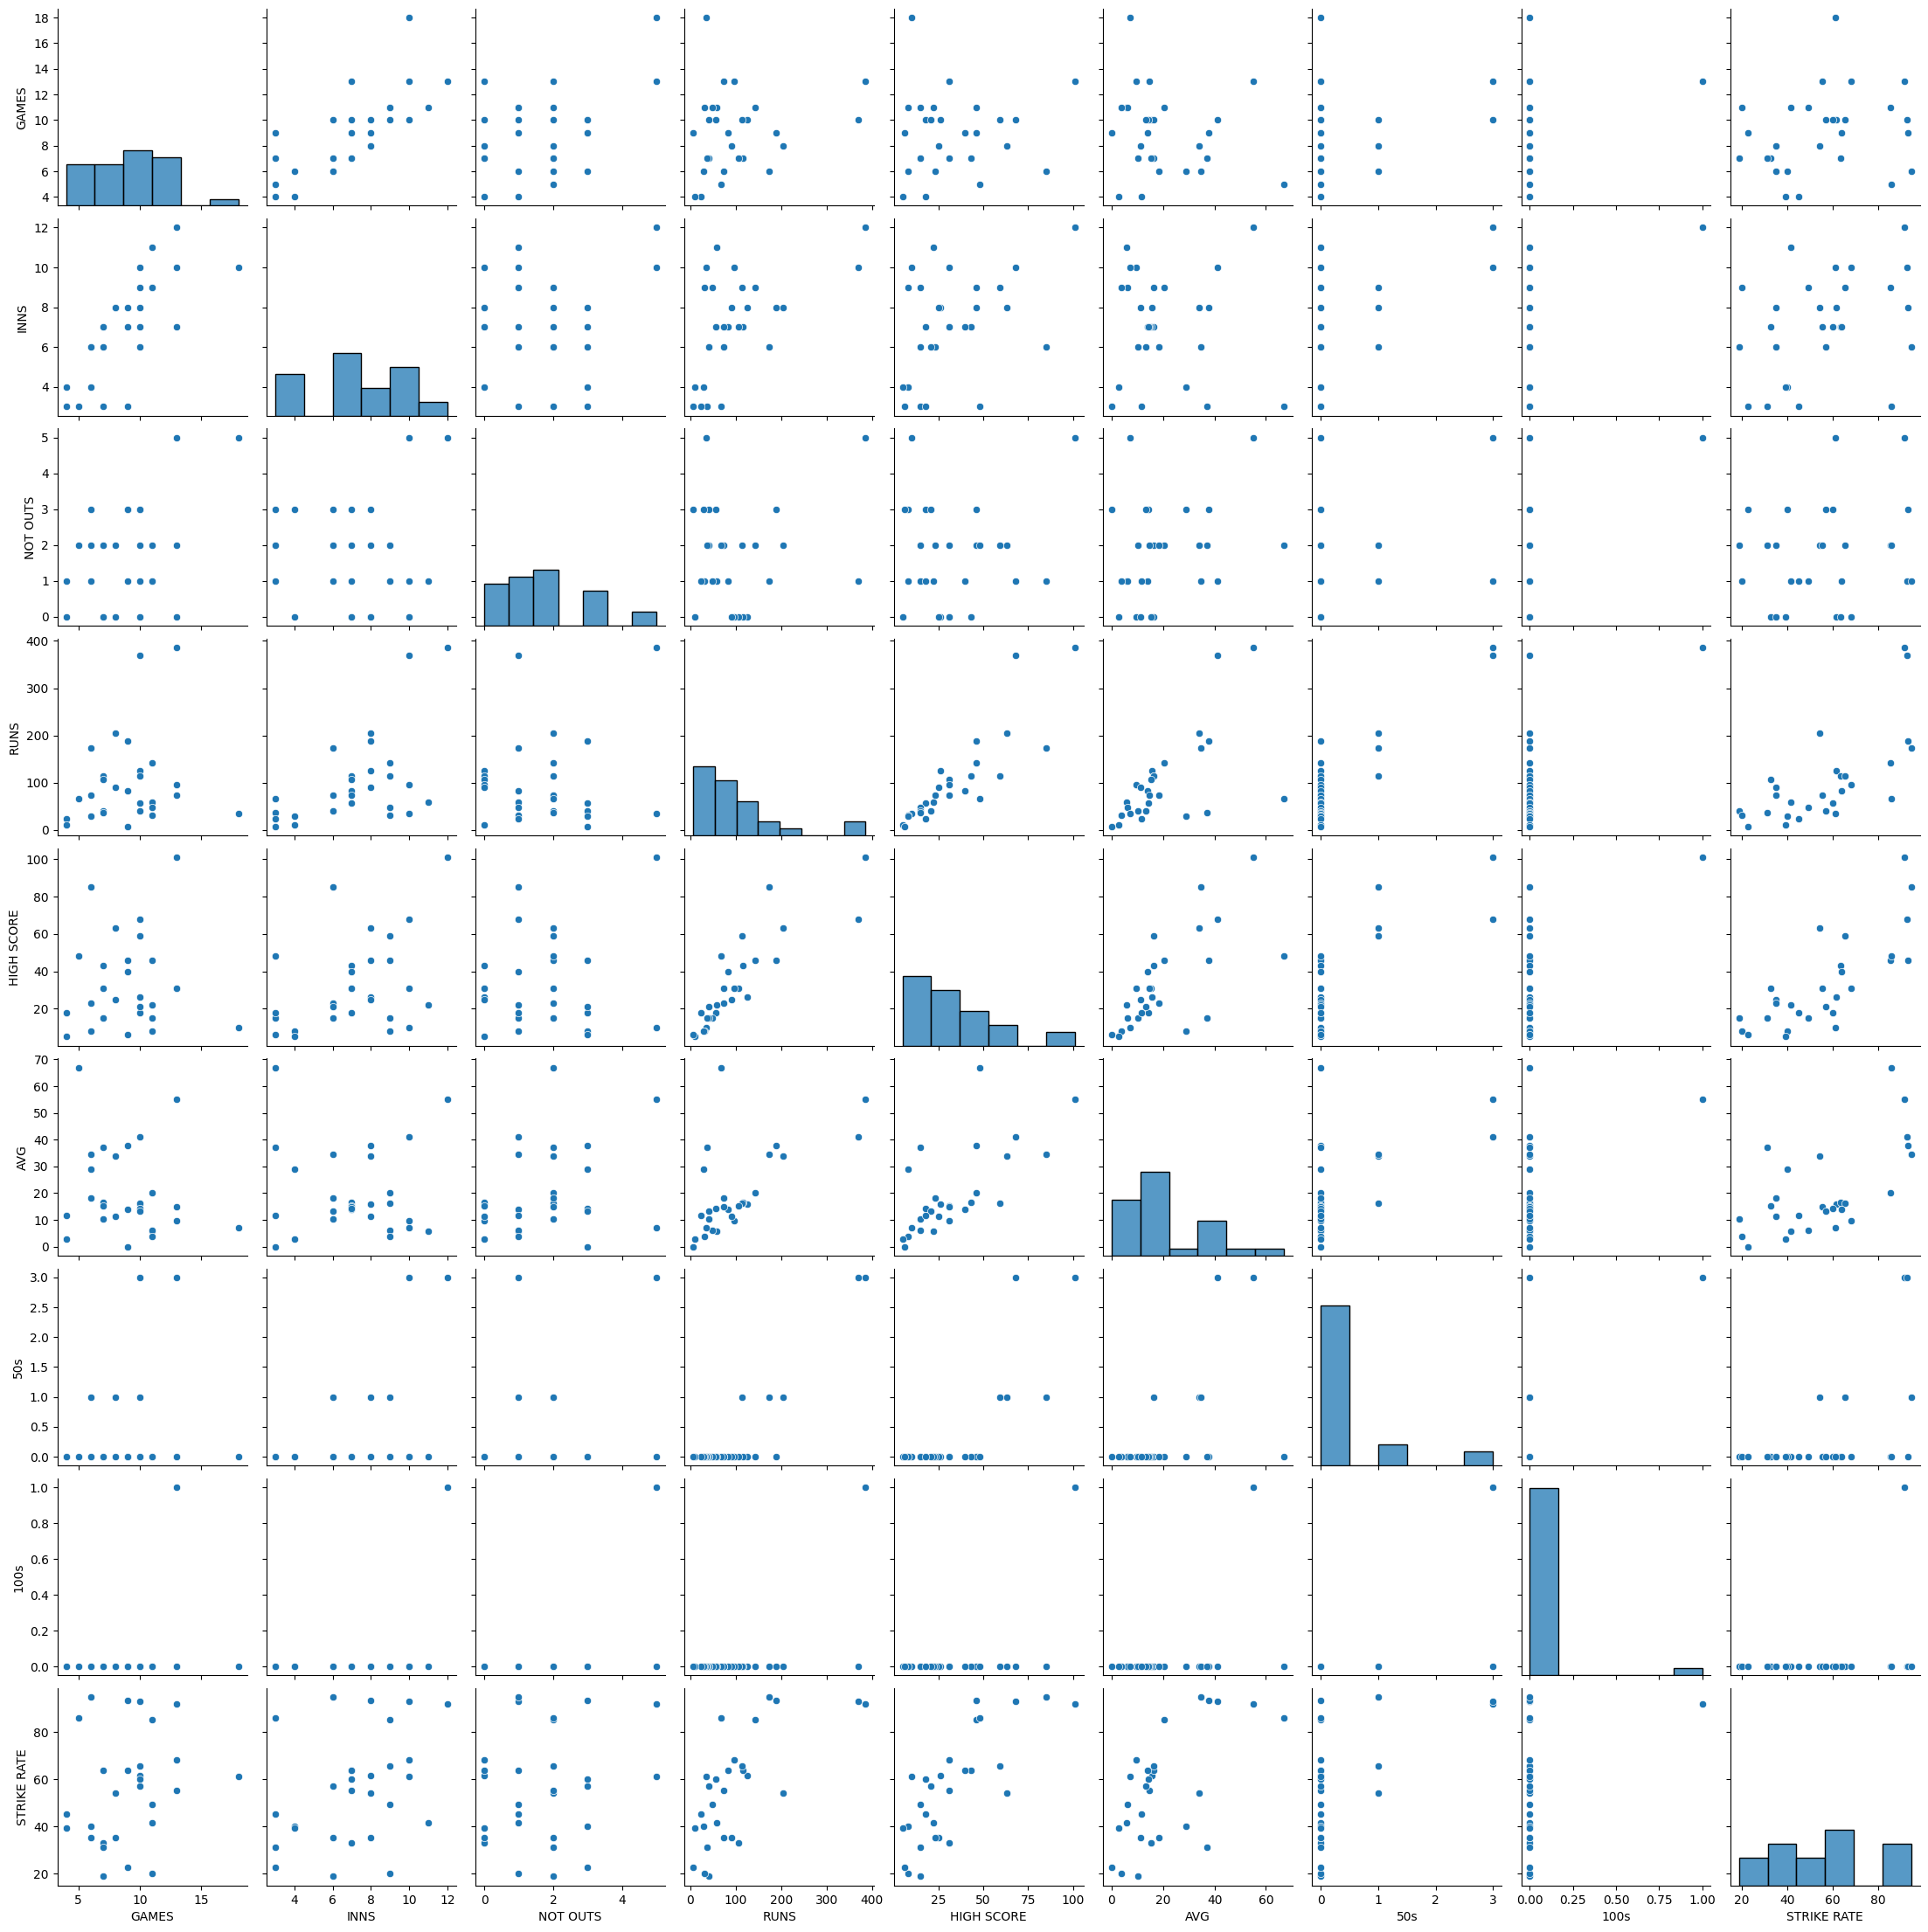

In [11]:
numeric_df = df.drop('Player', axis=1)
sns.pairplot(numeric_df)